In [77]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [78]:
np.random.seed(0)

In [105]:
#Labelling Data divided into Training and Validation set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [80]:
#assert() used to check the initial condition if not true, throws an assertion error
assert(x_train.shape[0] == y_train.shape[0]),"The number of Images is not equal to number of Labels"
assert(x_test.shape[0] == y_test.shape[0]),"The number of Images is not equal to number of Labels"
assert(x_train.shape[1:] == (28,28)),"The dimensions are not 28X28"

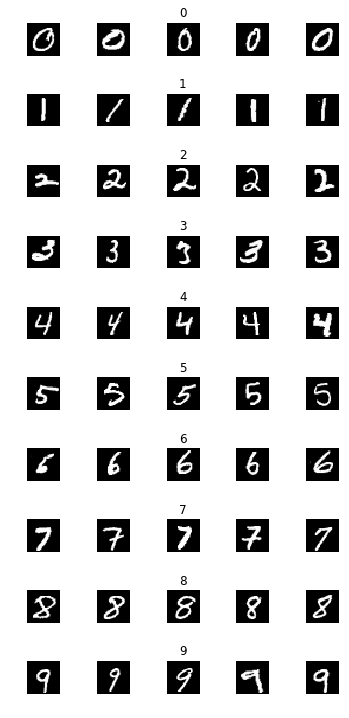

In [81]:
#Arrange the data
n_samples = []
coloumns = 5
n_classes = 10
fig, axs = plt.subplots(nrows = n_classes, ncols = coloumns, figsize = (5,10))
fig.tight_layout()
for i in range(coloumns):
    for j in range(n_classes):
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),:,:], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            n_samples.append(len(x_selected))

In [82]:
#Hot encoding
y_train = to_categorical (y_train, num_classes = 10)
y_test = to_categorical (y_test, num_classes = 10)


In [104]:
#Normalizing the data to scale down the features and get low variance 
x_train = x_train/255
x_test = x_test/255
print(x_test.shape)

(10000, 784)


In [103]:
#convert the 2 D image data array into 1D
#n_pixels = 784
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [85]:
#DNN for classification
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=784, activation ='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [86]:
model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
h = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.7148 - acc: 0.7698 - val_loss: 0.3871 - val_acc: 0.8798
Epoch 2/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.3745 - acc: 0.8901 - val_loss: 0.3070 - val_acc: 0.9093
Epoch 3/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.3232 - acc: 0.9062 - val_loss: 0.2646 - val_acc: 0.9220
Epoch 4/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.3079 - acc: 0.9089 - val_loss: 0.2496 - val_acc: 0.9270
Epoch 5/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.2901 - acc: 0.9135 - val_loss: 0.2454 - val_acc: 0.9270
Epoch 6/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.2910 - acc: 0.9133 - val_loss: 0.2571 - val_acc: 0.9217
Epoch 7/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.2808 - acc: 0.9175 - val_loss: 0.2606 - val_acc:

Text(0.5, 0, 'epoch')

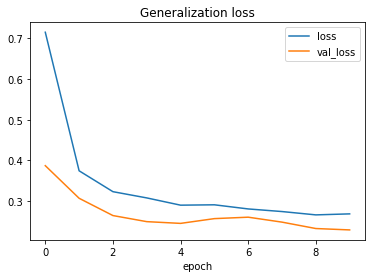

In [88]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Generalization loss')
plt.xlabel('epoch')


In [89]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:',score[1])

Test score: 0.27270779224634173
Test accuracy: 0.9199


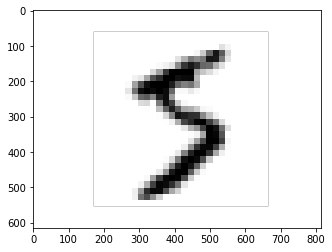

In [98]:
#testing the network
import requests
from PIL import Image
url = 'http://neuralnetworksanddeeplearning.com/images/more_data_rotated_5.png'
#8url = 'https://cdn-images-1.medium.com/max/1600/1*nlfLUgHUEj5vW7WVJpxY-g.png'
#2url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
test_image = Image.open(response.raw)
plt.imshow(test_image)

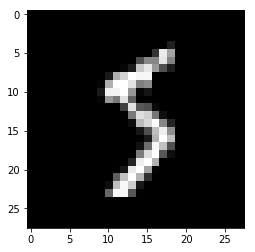

In [99]:
#Converting test image to database image dimensions to compare
import cv2

test_image_array = np.asarray(test_image)
resized = cv2.resize(test_image_array, (28,28))
gray_conv = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
final_test_img = cv2.bitwise_not(gray_conv)
plt.imshow(final_test_img, cmap=plt.get_cmap("gray"))


In [100]:
final_test_img = final_test_img/255
final_test_img = final_test_img.reshape(1, 784)


In [101]:
prediction = model.predict_classes(final_test_img)
print("Prediction is ", str(prediction))


Prediction is  [3]
